# Problem set 6: Solving the Solow model

In [1]:
import sympy as sm
from scipy import optimize
import matplotlib.pyplot as plt
import ipywidgets as widgets

plt.rcParams['figure.figsize'] = [16, 8]

%load_ext autoreload
%autoreload 2

from modelproject import SolowModelClass

# Solow-Swan model with Limited Ressources

## Introduction

Consider the **extended Solow-model** where:

1. $K_t$ is capital
2. $L_t$ is labor (growing with a constant rate of $n$)
3. $A_t$ is technology (growing with a constant rate of $g$)
4. $E_t$ is the limited ressource which is used up over time
4. $Y_t = F(K_t, E_t,A_tL_t)$ is GDP

The **production function** is assumed of form **Cobb-Douglas** i.e.

$$
Y_t = F(K_{t},A_{t}L_{t})=K_{t}^{\alpha}(A_{t}L_{t})^{1-\varepsilon-\alpha}E_t^{\varepsilon}, \alpha + \varepsilon \leq 1
$$

The **limited ressource** has a reserve $R_0$ and in each period $E_t$ of this reserve is used. Thus $E_t$ and $R_t$ follows

$$
E_t = s_E R_t, s_E \in (0,1)
$$

$$
R_{t} = R_{t-1} - E_{t-1} = (1-s_E)R_{t-1} = (1-s_E)^t R_0
$$

**Saving** is a constant fraction of GDP

$$ 
S_t = s_YY_t,\,s_Y\in(0,1)
$$

such that **capital accumulates** according to

$$
K_{t+1}=S_{t}+(1-\delta)K_{t}, \delta \in (0,1)
$$

The **population** grows with n each year 

$$
L_{t+1} = (1+n)L_t, n > -1 
$$

The **technology** growth follows an exogenous path of 

$$
A_{t+1} = (1+g)A_t
$$ 

## Analytical Steady State

We will evaluate the steady state in the capital output ratio, $z_t \equiv \frac{K_t}{Y_t}$.
$$
z_{t+1} = \frac{K_{t+1}}{Y_{t+1}} = \frac{K_{t+1}^{1-\alpha}}{(A_{t+1}L_{t+1})^{1-\varepsilon-\alpha}E_{t+1}^\varepsilon}
$$

Inserting savings into the capital accumulation equation and rewriting yields
$$
z_{t+1} = \frac{(s_{Y} Y_{t} +(1-\delta)K_{t})^{1-\alpha}}{(A_{t+1}L_{t+1})^{1-\varepsilon-\alpha}E_{t+1}^\varepsilon} = \frac{(s_{Y} +(1-\delta)z_t)^{1-\alpha}}{((1+g)(1+n))^{1-\varepsilon-\alpha}(1-s_E)^{\varepsilon}} \frac{Y_t^{1-\alpha}}{(A_{t}L_{t})^{1-\varepsilon-\alpha}E_{t}^\varepsilon} = \frac{(s_{Y} +(1-\delta)z_t)^{1-\alpha}}{((1+g)(1+n))^{1-\varepsilon-\alpha}(1-s_E)^{\varepsilon}}z_t^\alpha
$$

We use **sympy** to find an analytical expression for the steady state, i.e. solve

$$
z^* = \frac{(s_{Y} +(1-\delta)z^*)^{1-\alpha}}{((1+g)(1+n))^{1-\varepsilon-\alpha}(1-s_E)^{\varepsilon}}(z^*)^\alpha
$$

However, **sympy** for some reason has some problems solving this, thus, we start by helping it a bit on the right track
$$
(z^*)^{1-\alpha} = \frac{(s_{Y} +(1-\delta)z^*)^{1-\alpha}}{((1+g)(1+n))^{1-\varepsilon-\alpha}(1-s_E)^{\varepsilon}} \Leftrightarrow
$$

$$
z^* = \frac{1}{\left(((1+g)(1+n))^{1-\varepsilon-\alpha}(1-s_E)^{\varepsilon}\right)^{\frac{1}{1-\alpha}}} (s_{Y} +(1-\delta)z^*)
$$

In [2]:
model = SolowModelClass()
analytical_ss = model.analytic_ss()

sm.Eq(sm.symbols('z'),analytical_ss)

Eq(z, s_Y/(delta - 1 + ((1 - s_E)**epsilon*(g*n + g + n + 1)**(-alpha - epsilon + 1))**(-1/(alpha - 1))))

## Nummerical Solution of the Model

We will nummerically solve this model using 2 different methods – **Bisect**, and **Brent** – and evaluate their precession when comparing to the analytical solution evaluated in the same parameter values.

To solve the model we evaluate when it holds that
$$
0 = z_{t+1}-z_t = \frac{(s_{Y} +(1-\delta)z_t)^{1-\alpha}}{((1+g)(1+n))^{1-\varepsilon-\alpha}(1-s_E)^{\varepsilon}}z_t^\alpha - z_t
$$

All the numerical optimizers are defined in the [modelproject.py](modelproject.py) thus, here we just call them

In [7]:
model = SolowModelClass()
model.setup()

# Solve for nummerical steady state
zstar_bisect = model.solve_ss(method='bisect',do_print=True)
zstar_brent = model.solve_ss(method='brentq',do_print=True)

# Evaluate analytical steady state
zstar_analytic = model.evaluate_ss(analytical_ss,do_print=True)


      converged: True
           flag: 'converged'
 function_calls: 48
     iterations: 46
           root: 1.4028207764242397
      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 1.4028207764243779
z = 1.40282077642438


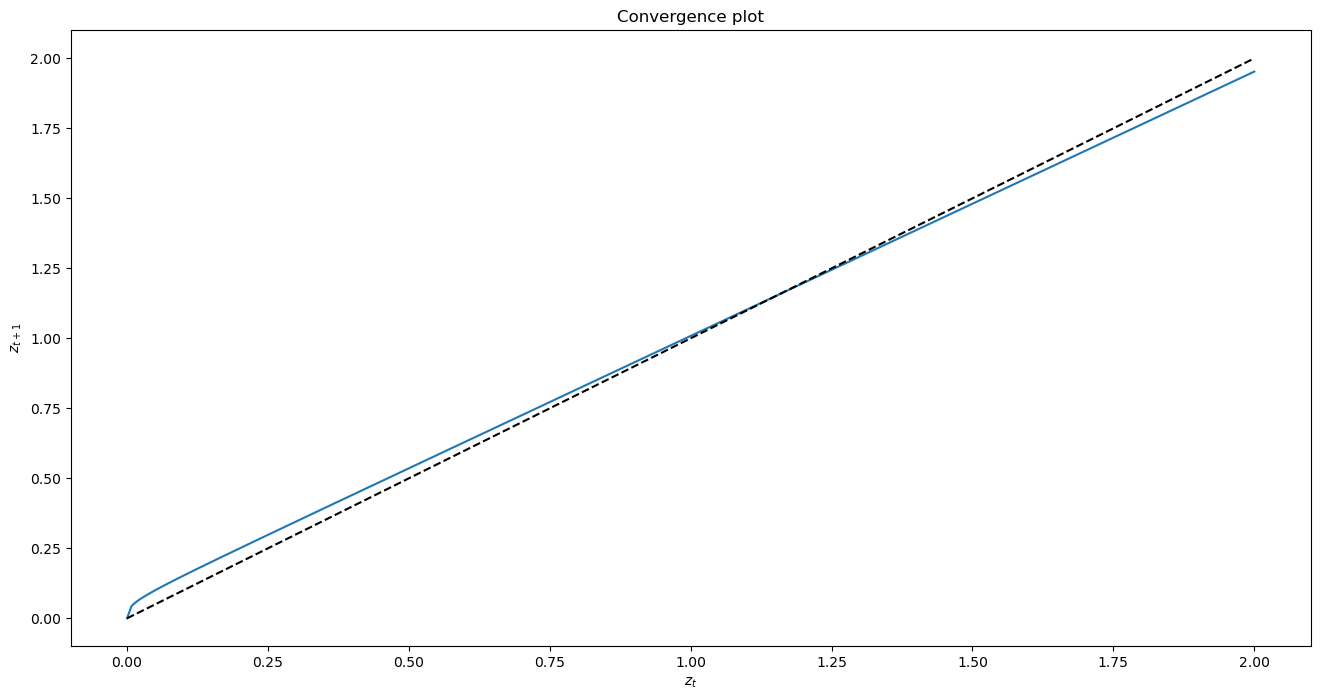

In [4]:
model.convergence_plot()

## Further analysis

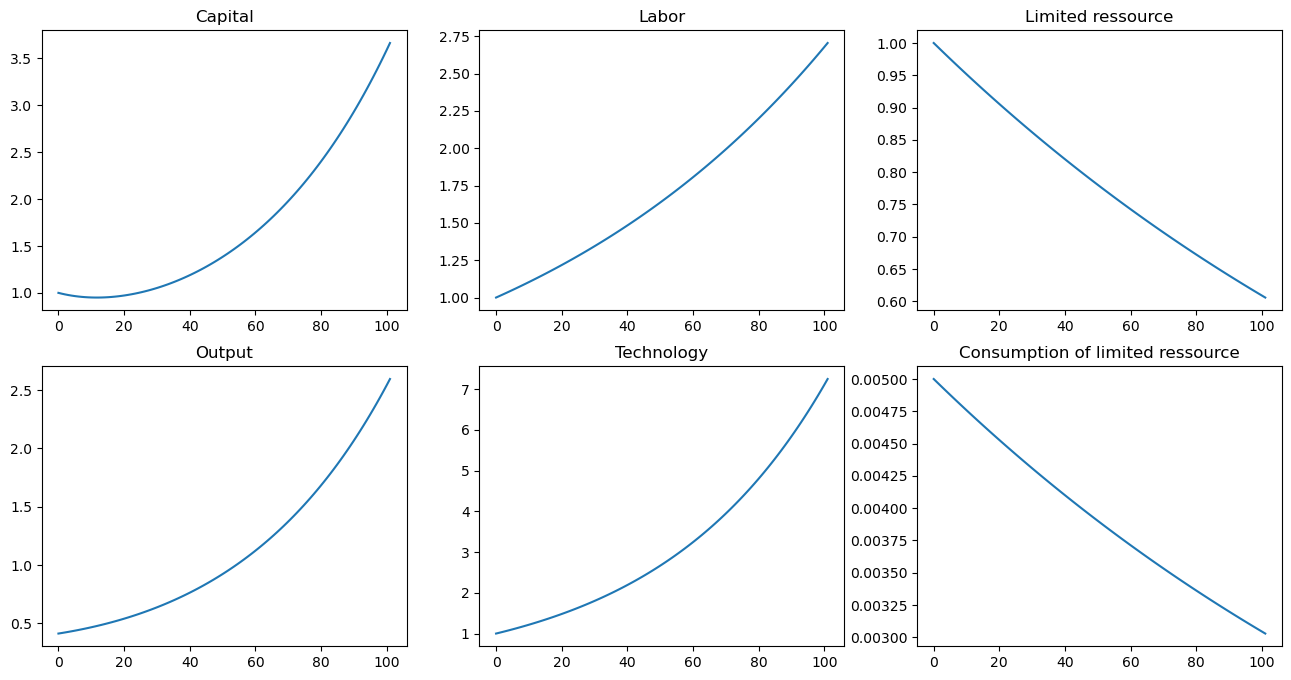

In [6]:
model.simulate(do_print=True)

## Conclusion